In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Проводим первичный отсмотр данных методом info(). Всего 395 записей. У нас 13 столбцов формата float64 или int64 и 17 формата object. Обнаружили неизвестный столбец 'studytime, granular'. Пока не удалаяем. Размер данных 92.7+ KB. По сути истинно численными признаками в наших данных являются только absences и score. Большую часть оставшихся категориальных данных без потерь можно свести к бинарным 1 и 0, или небольшим категориям ('teacher' - 1, 'health' - 2, 'services' - 3, 'at_home' - 4, 'other' - 5).

In [2]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
print(stud.shape)

(395, 30)


Проверяем данные методом describe(). Сразу видим ошибку в данных образования отца (значение Fedu не может быть более 4).

In [4]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Посмотрим на попарную корреляцию количиственных данных. Заметна обратная связь между количеством неудач и оценкой (коэфициент корреляций -0,34)и необъяснимая связь между образованием матери и оценкой (коэфициент корреляций 0,21). Полная обратная зависимость параметра "studytime" и "studytime, granular"(коэфициент корреляций -1)говорит нам, что можно удалять столбец "studytime, granular" без последствий (значения "studytime" 1,2,3 и 4 были просто заменены в  "studytime, granular" на -3, -6, -9, -12 соответственно).

In [5]:
display(round(stud.corr(),2))

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.00,-0.16,-0.14,0.08,-0.02,0.23,0.02,0.07,0.03,0.14,-0.07,0.09,-0.16
Medu,-0.16,1.00,0.28,-0.17,0.08,-0.25,-0.08,-0.01,0.03,0.06,-0.05,-0.01,0.21
Fedu,-0.14,0.28,1.00,0.03,0.06,-0.15,-0.06,0.04,-0.07,-0.02,0.03,0.00,0.08
traveltime,0.08,-0.17,0.03,1.00,-0.10,0.06,0.10,-0.02,-0.02,0.04,-0.02,-0.05,-0.07
studytime,-0.02,0.08,0.06,-0.10,1.00,-0.18,-1.00,0.05,-0.12,-0.05,-0.08,-0.03,0.12
failures,0.23,-0.25,-0.15,0.06,-0.18,1.00,0.18,-0.02,0.10,0.12,0.08,0.06,-0.34
"studytime, granular",0.02,-0.08,-0.06,0.10,-1.00,0.18,1.00,-0.05,0.12,0.05,0.08,0.03,-0.12
famrel,0.07,-0.01,0.04,-0.02,0.05,-0.02,-0.05,1.00,0.18,0.08,0.08,-0.08,0.06
freetime,0.03,0.03,-0.07,-0.02,-0.12,0.10,0.12,0.18,1.00,0.30,0.06,0.01,0.02
goout,0.14,0.06,-0.02,0.04,-0.05,0.12,0.05,0.08,0.30,1.00,-0.02,-0.05,-0.13


<AxesSubplot:>

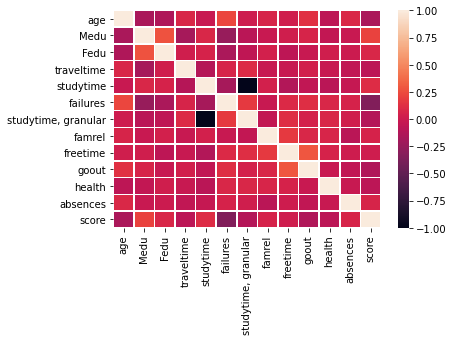

In [6]:
sns.heatmap(stud.corr(),annot=False, linewidths=.5)

In [7]:
stud.drop(['studytime, granular'], inplace = True, axis = 1) #удаляем не информативный столбец

In [8]:
#Функции замены пробелов в данных на .... (None, медиану столбца,среднее столбца, моду, рандомное значение из списка)
def change_nan_to_none(column_list):
    stud[column] = stud[column].apply(lambda x: None if str(x) == 'nan' else x)

def change_nan_to_median(column_list):
    med_column = stud[column].median()
    stud[column] = stud[column].apply(lambda x: med_column if str(x) == 'nan' else x)

def change_nan_to_mean(column_list):
    mean_column = stud[column].mean()
    stud[column] = stud[column].apply(lambda x: mean_column if str(x) == 'nan' else x)

def change_nan_to_mode(column_list):
    mode_column = stud[column].mode()[0]
    stud[column] = stud[column].apply(lambda x: mode_column if str(x) == 'nan' else x)

np.random.seed(1)    
def change_rand(column, change_list):
    stud[column] = stud[column].apply(lambda x: np.random.choice(change_list,1)[0] if pd.isna(x) else x)
#change_list = ['yes','no']
#change_rand('romantic',change_list)
    
    #вызов функции замены данных    
#for column in column_list:
#    change_none(column_list)

In [9]:
#создаем разные списки названий столбцов для обращения к функциям
column_list_number = stud.select_dtypes(include='number').columns #только столбцы с цифрами в значениях
column_list_object = stud.select_dtypes(include='object').columns #только столбцы с объектами в значениях
column_list = stud.columns #все столбцы

Для того, чтобы не перебирать данные 30 столбцов вручную пишем функцию первичного анализа данных.

#first_lookup Функция первичного анализа данных в столбцах выводит:
    название столбца
    количество заполненых данных
    количество недостающих данных
    подсчет количества разных элементов столбца value_counts()
    функцию describe() сгрупированного столбца по целевой переменной score для предварительного анализа влияния параметра на score
    

In [10]:
def first_lookup(column_list):
    print('Столбец',column,'содержит значений -',stud[column].count(),', не заполненных значений -', stud[column].isnull().sum()) 

    print('\n',stud[column].value_counts(sort = False))
    print('\nВ процентах:')
    print('\n',round(stud[column].value_counts(sort = False,normalize=True)*100,2))
    
    print('\nФункция describe() сгрупированного столбца по столбцу score')
    print('\n',stud.groupby([column])['score'].describe(),'\n')
    print('\n')
    #print('\nУникальные значения',stud[column].unique(),'\n')
    boxplot=stud.boxplot(column = ['score'], by=[column])


Столбец school содержит значений - 395 , не заполненных значений - 0

 MS     46
GP    349
Name: school, dtype: int64

В процентах:

 MS    11.65
GP    88.35
Name: school, dtype: float64

Функция describe() сгрупированного столбца по столбцу score

         count       mean        std  min   25%   50%   75%    max
school                                                           
GP      344.0  52.630814  23.116772  0.0  40.0  55.0  70.0  100.0
MS       45.0  49.444444  21.379212  0.0  40.0  50.0  65.0   95.0 



Столбец sex содержит значений - 395 , не заполненных значений - 0

 M    187
F    208
Name: sex, dtype: int64

В процентах:

 M    47.34
F    52.66
Name: sex, dtype: float64

Функция describe() сгрупированного столбца по столбцу score

      count       mean        std  min   25%   50%   75%    max
sex                                                           
F    204.0  50.098039  23.070682  0.0  40.0  55.0  65.0   95.0
M    185.0  54.648649  22.572608  0.0  45.0  55.0  70.0 

Столбец failures содержит значений - 373 , не заполненных значений - 22

 0.0    293
3.0     15
2.0     16
1.0     49
Name: failures, dtype: int64

В процентах:

 0.0    78.55
3.0     4.02
2.0     4.29
1.0    13.14
Name: failures, dtype: float64

Функция describe() сгрупированного столбца по столбцу score

           count       mean        std  min    25%   50%    75%    max
failures                                                             
0.0       290.0  56.051724  20.905474  0.0  46.25  55.0  70.00  100.0
1.0        48.0  40.000000  23.856843  0.0  32.50  42.5  60.00   90.0
2.0        15.0  32.333333  24.191695  0.0  10.00  40.0  45.00   75.0
3.0        14.0  29.642857  20.797955  0.0   6.25  35.0  48.75   50.0 



Столбец schoolsup содержит значений - 386 , не заполненных значений - 9

 yes     51
no     335
Name: schoolsup, dtype: int64

В процентах:

 yes    13.21
no     86.79
Name: schoolsup, dtype: float64

Функция describe() сгрупированного столбца по столбцу score

     

C:\Users\Yerlan\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


, не заполненных значений - 31

 yes    124
no     240
Name: romantic, dtype: int64

В процентах:

 yes    34.07
no     65.93
Name: romantic, dtype: float64

Функция describe() сгрупированного столбца по столбцу score

           count       mean        std  min   25%   50%   75%    max
romantic                                                           
no        235.0  54.574468  22.126042  0.0  45.0  55.0  70.0  100.0
yes       123.0  47.682927  24.564174  0.0  40.0  55.0  65.0   90.0 



Столбец famrel содержит значений - 368 , не заполненных значений - 27

  4.0    182
 5.0     99
 3.0     62
-1.0      1
 2.0     17
 1.0      7
Name: famrel, dtype: int64

В процентах:

  4.0    49.46
 5.0    26.90
 3.0    16.85
-1.0     0.27
 2.0     4.62
 1.0     1.90
Name: famrel, dtype: float64

Функция describe() сгрупированного столбца по столбцу score

         count       mean        std   min   25%   50%   75%    max
famrel                                                            
-1.0   

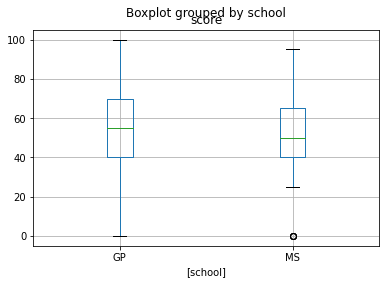

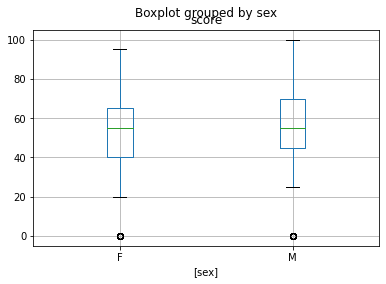

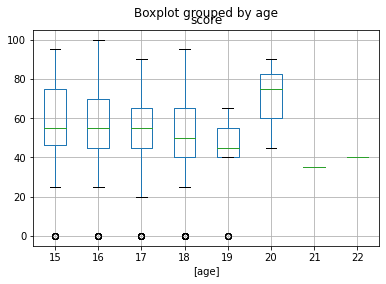

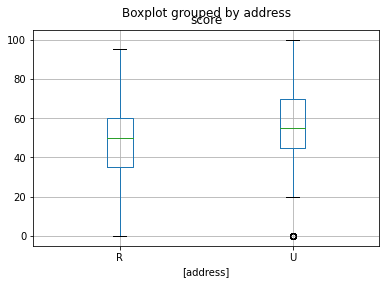

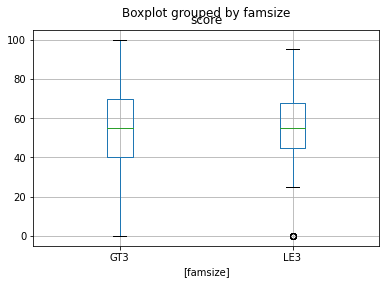

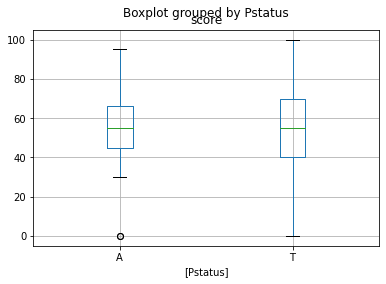

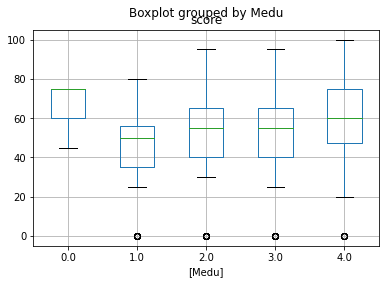

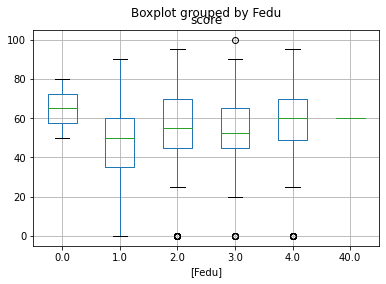

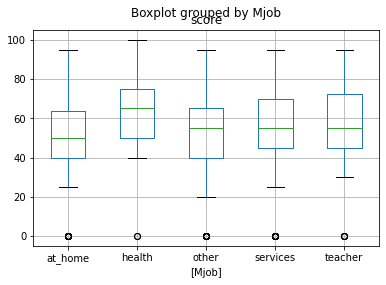

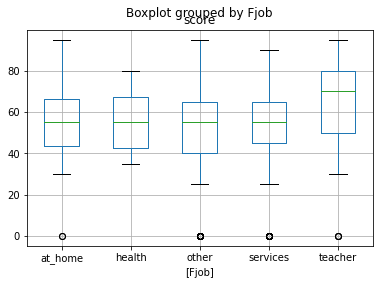

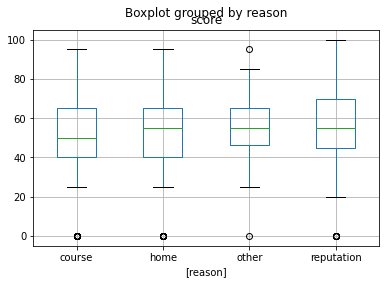

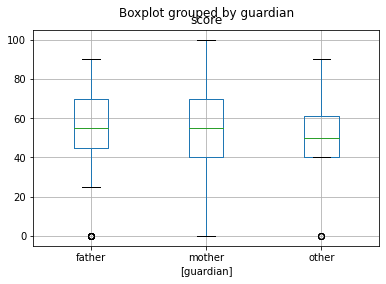

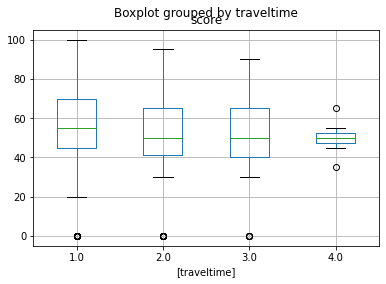

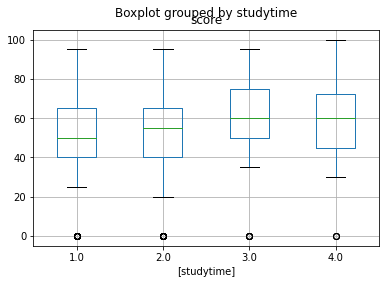

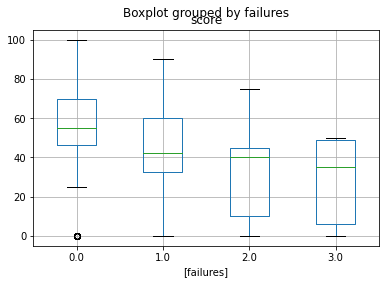

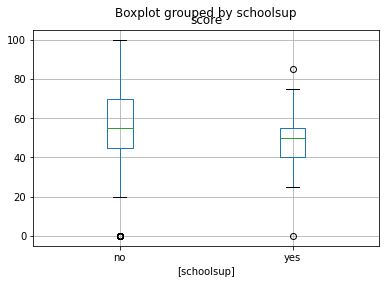

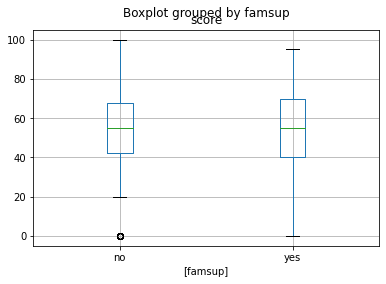

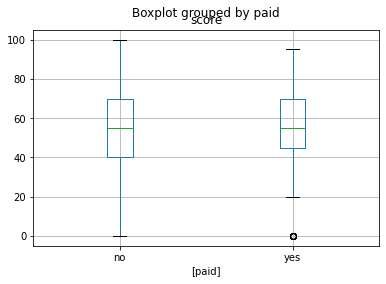

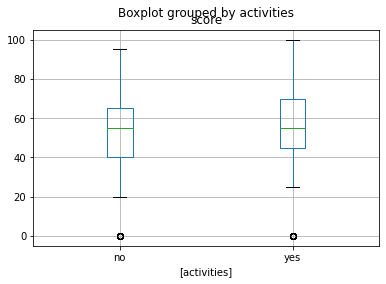

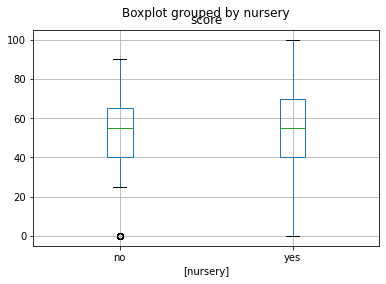

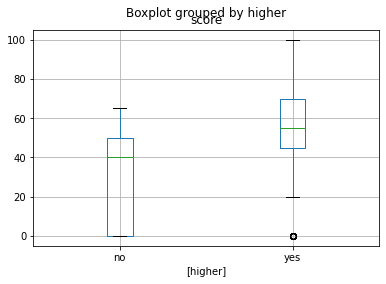

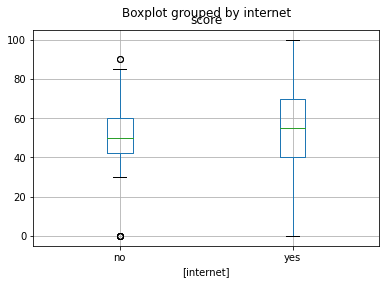

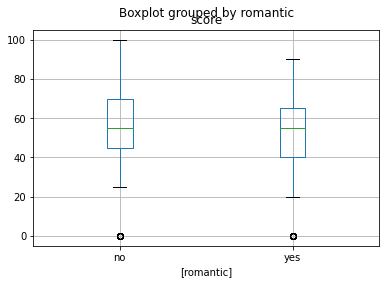

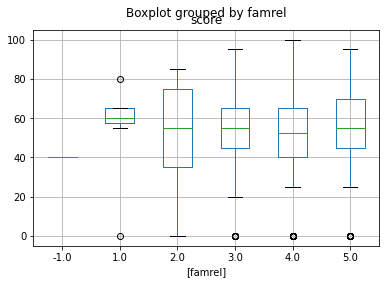

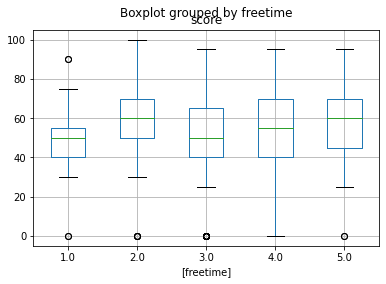

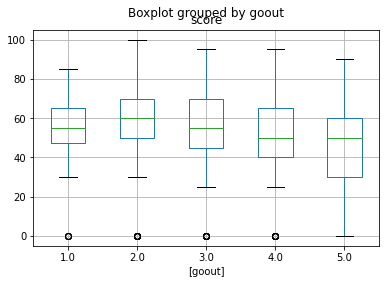

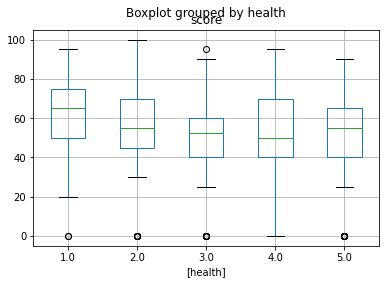

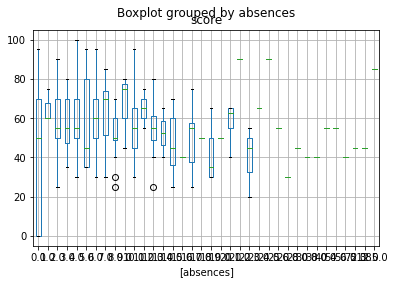

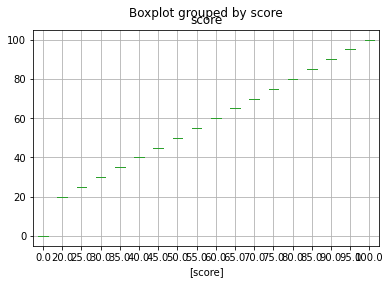

In [11]:
column_list = stud.columns

for column in column_list:
    first_lookup(column_list)

С беглого просмотра полученных данных видим, что:
* Студенты GP получают в среднем большую оценку чем студенты MS. Медиана также выше на 5 балов. Это может быть связано с количеством данных с MS!
* в опросе участвовали студенты в основном 15-19 лет и только 5 человек из 395 были старше 19, что не является выбросом, так как допустимо условиями. В дальнейшем при расширений выборки данных старших учеников может быть больше. В целом этот параметр не информативен. Х
* Ученики проживающие за городом в среднем получают на 5 балов меньше своих городских сверстников !
* Размер семьи(famsize),проживание (Pstatus)не влияют на оценку, этим параметром можно пренебречь Х
* Образование матери и отца влияют на оценку ученика. Чем образованнее родители, тем выше оценка !
* У работающих в сфере медицины матерей и сфере образовании отцов дети в среднем имеют более высокую оценку. !
* Параметр reason не влияет на оценку, этим параметром можно пренебречь Х
* Параметр guardian не влияет на оценку, этим параметром можно пренебречь Х
* Чем меньше время до школы (traveltime) тем выше средняя оценка !
* Чем больше время потраченное на уроки (studytime) тем выше средняя оценка !
* Чем больше оличество внеучебных неудач (failures) тем ниже средняя оценка !
* Ученики без дополнительной образовательной поддержки получают больший бал (schoolsup?)
* Семейная образовательная поддержка (famsup) слабо влияет на оценку Х 
* Дополнительные платные занятия по математике (paid) слабо влияют на оценку, но надо учесть что 10% респондентов не ответили на данный вопрос Х
* activities,nursery,romantic слабо влияют на оценку Х
* У тех у кого есть internet в среднем выше оценка !
* У студентов желающих поступить в высшее учебное заведение в среднем выше оценка !
* Есть выброс в столбце famrel, значение не может быть -1. Скорее всего была ошибка при вводе данных. Надо заменить на 1 !
* freetime,  goout, health лучше оставить в датасете !
* Числовой параметр absences и score надо проверить отдельно.
* Целевая переменная score имеет пропуски, удалим 6 строк так как их произвольное заполнение ухудшит качество датасета.


! - оставить показатель
Х - удалить показатель

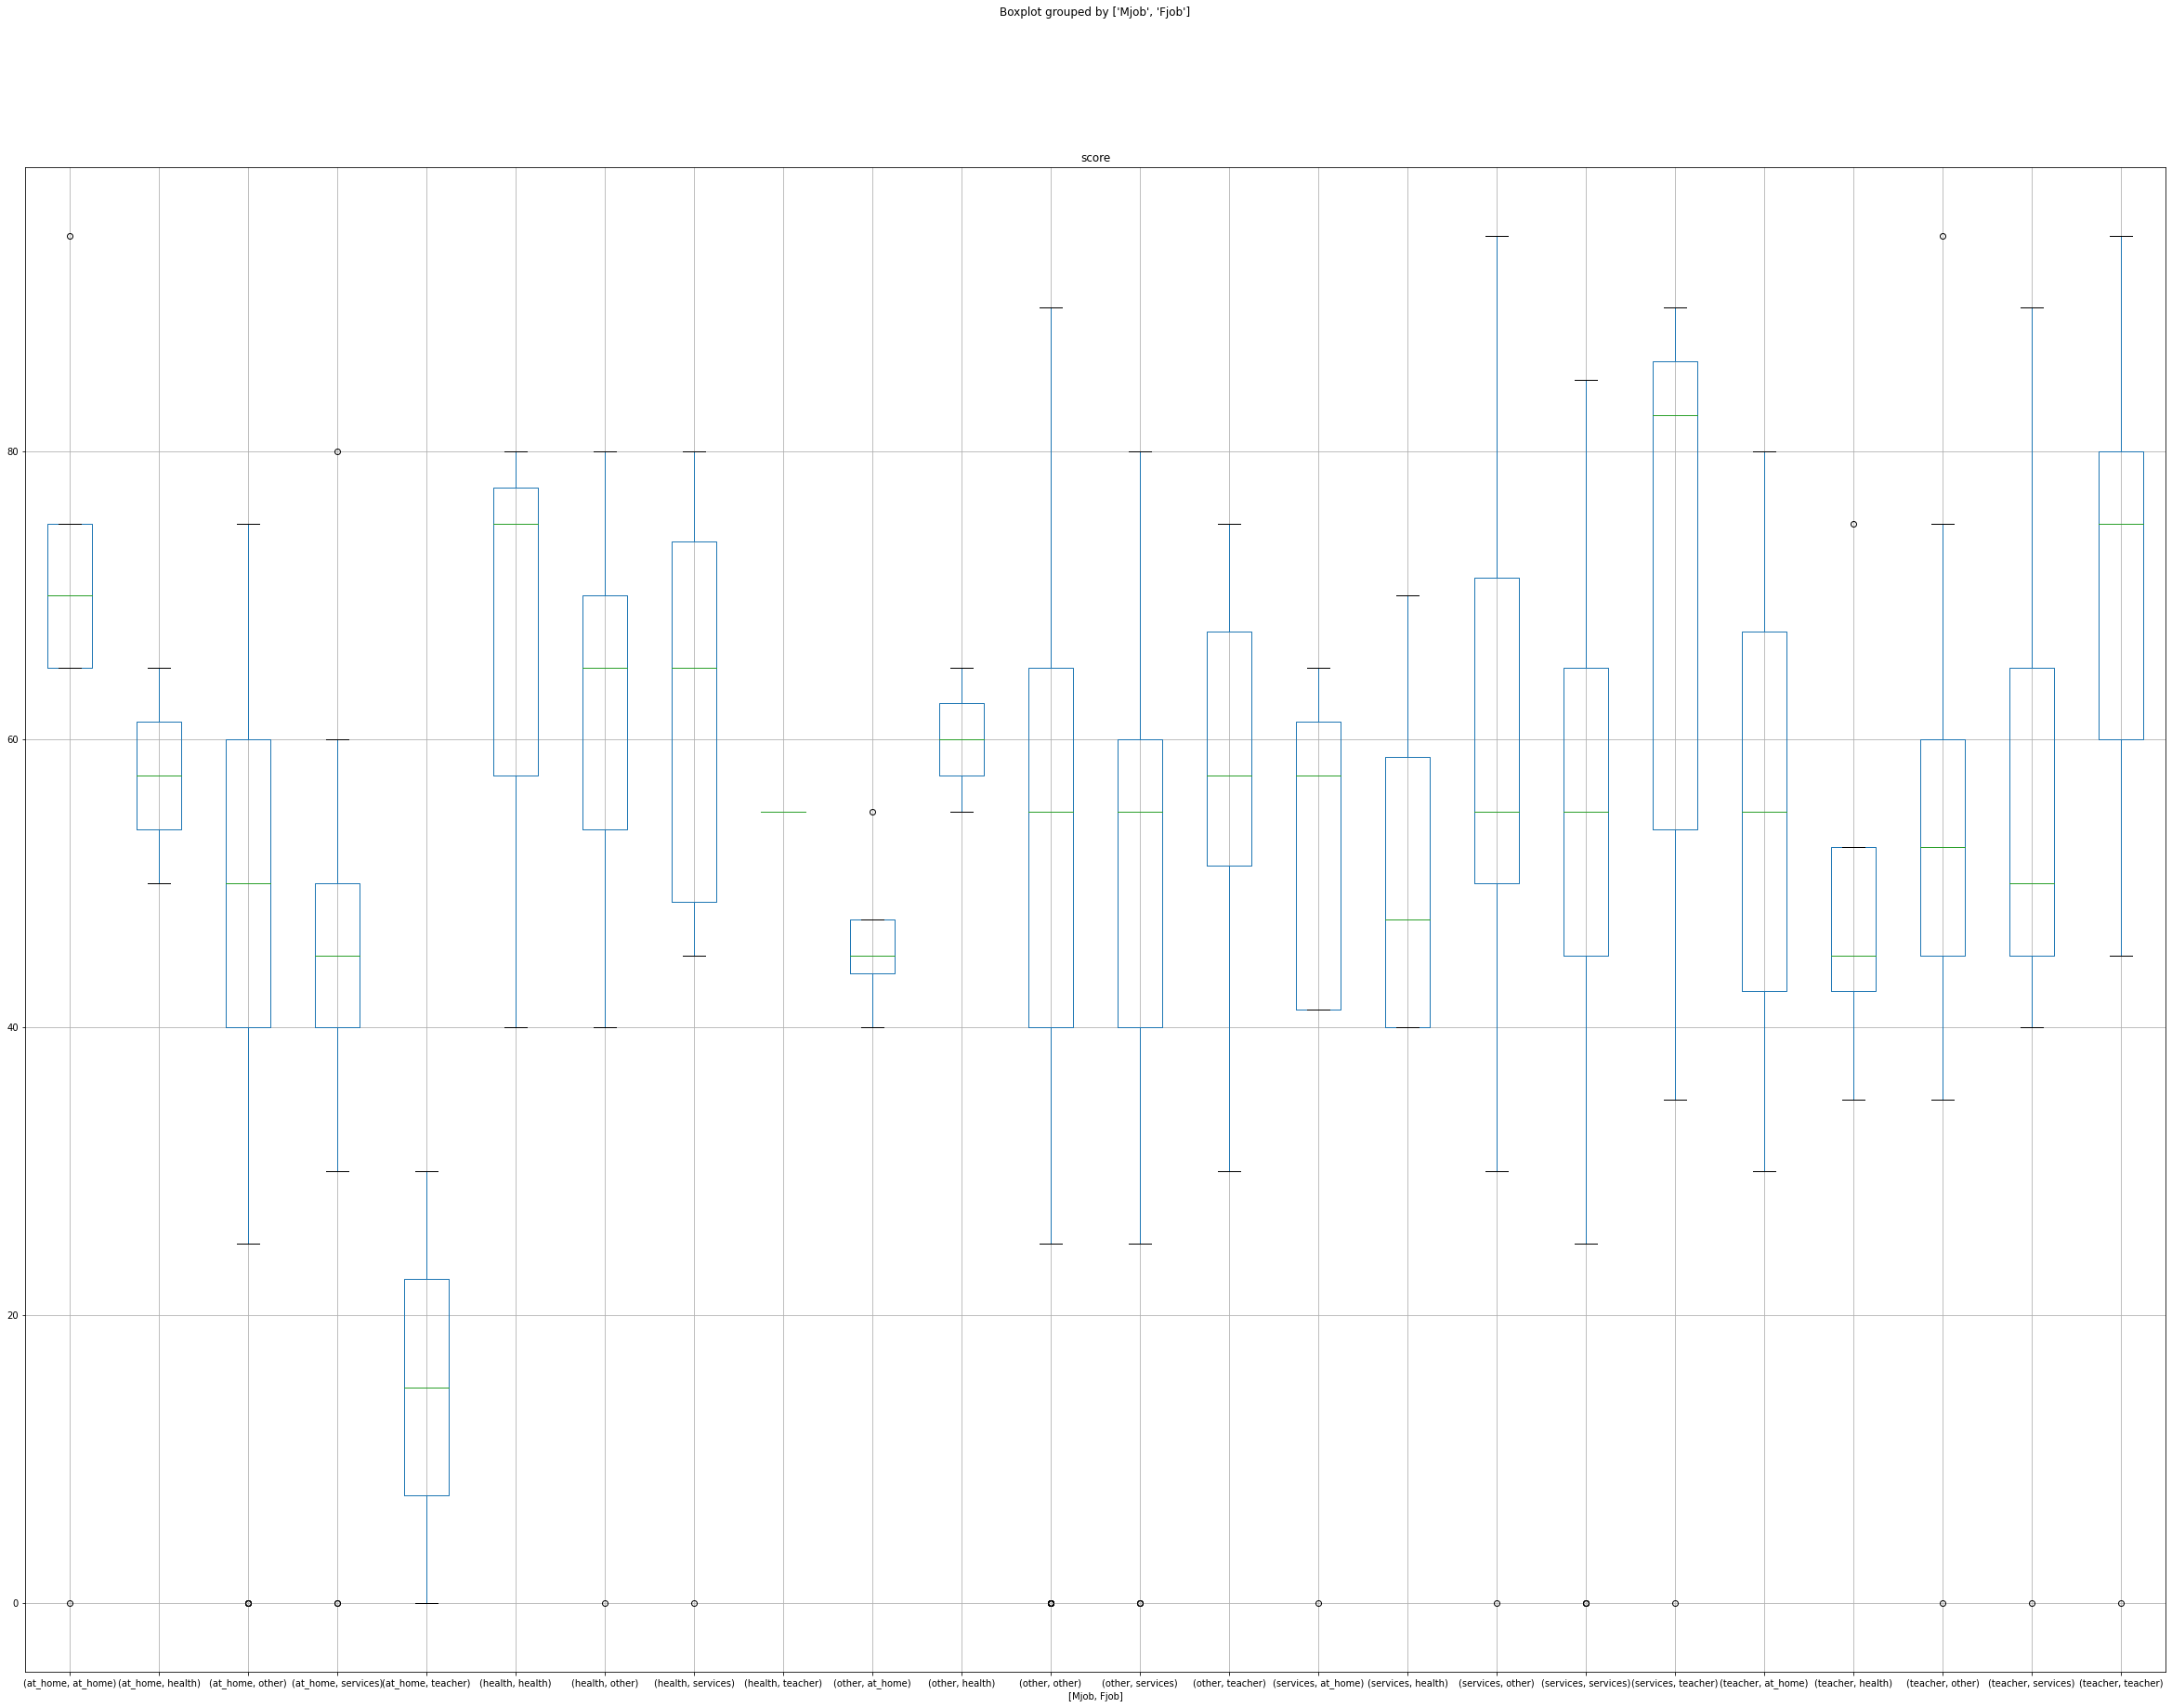

In [12]:
boxplot=stud.boxplot(column = ['score'], by=['Mjob','Fjob'],figsize=(40,30))
#'Mjob'=services,'Fjob'=teacher  имеют наивысший результат, эти признаки однозначно надо оставить в датасете. 

In [13]:
stud.loc[stud[(stud['Mjob']=='services')&(stud['Fjob']=='teacher')].index]
#6 из 8 набрали более 80 балов!

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
196,GP,M,17,U,GT3,T,4.0,4.0,services,teacher,NaN,mother,1.0,1.0,0.0,no,no,no,no,yes,yes,yes,no,5.0,2.0,3.0,5.0,4.0,80.0
198,GP,F,17,U,GT3,NaN,4.0,4.0,services,teacher,home,mother,2.0,1.0,1.0,no,yes,no,no,yes,yes,NaN,no,4.0,2.0,4.0,2.0,24.0,90.0
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
287,GP,F,17,U,GT3,T,1.0,NaN,services,teacher,reputation,mother,1.0,3.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,3.0,3.0,6.0,60.0


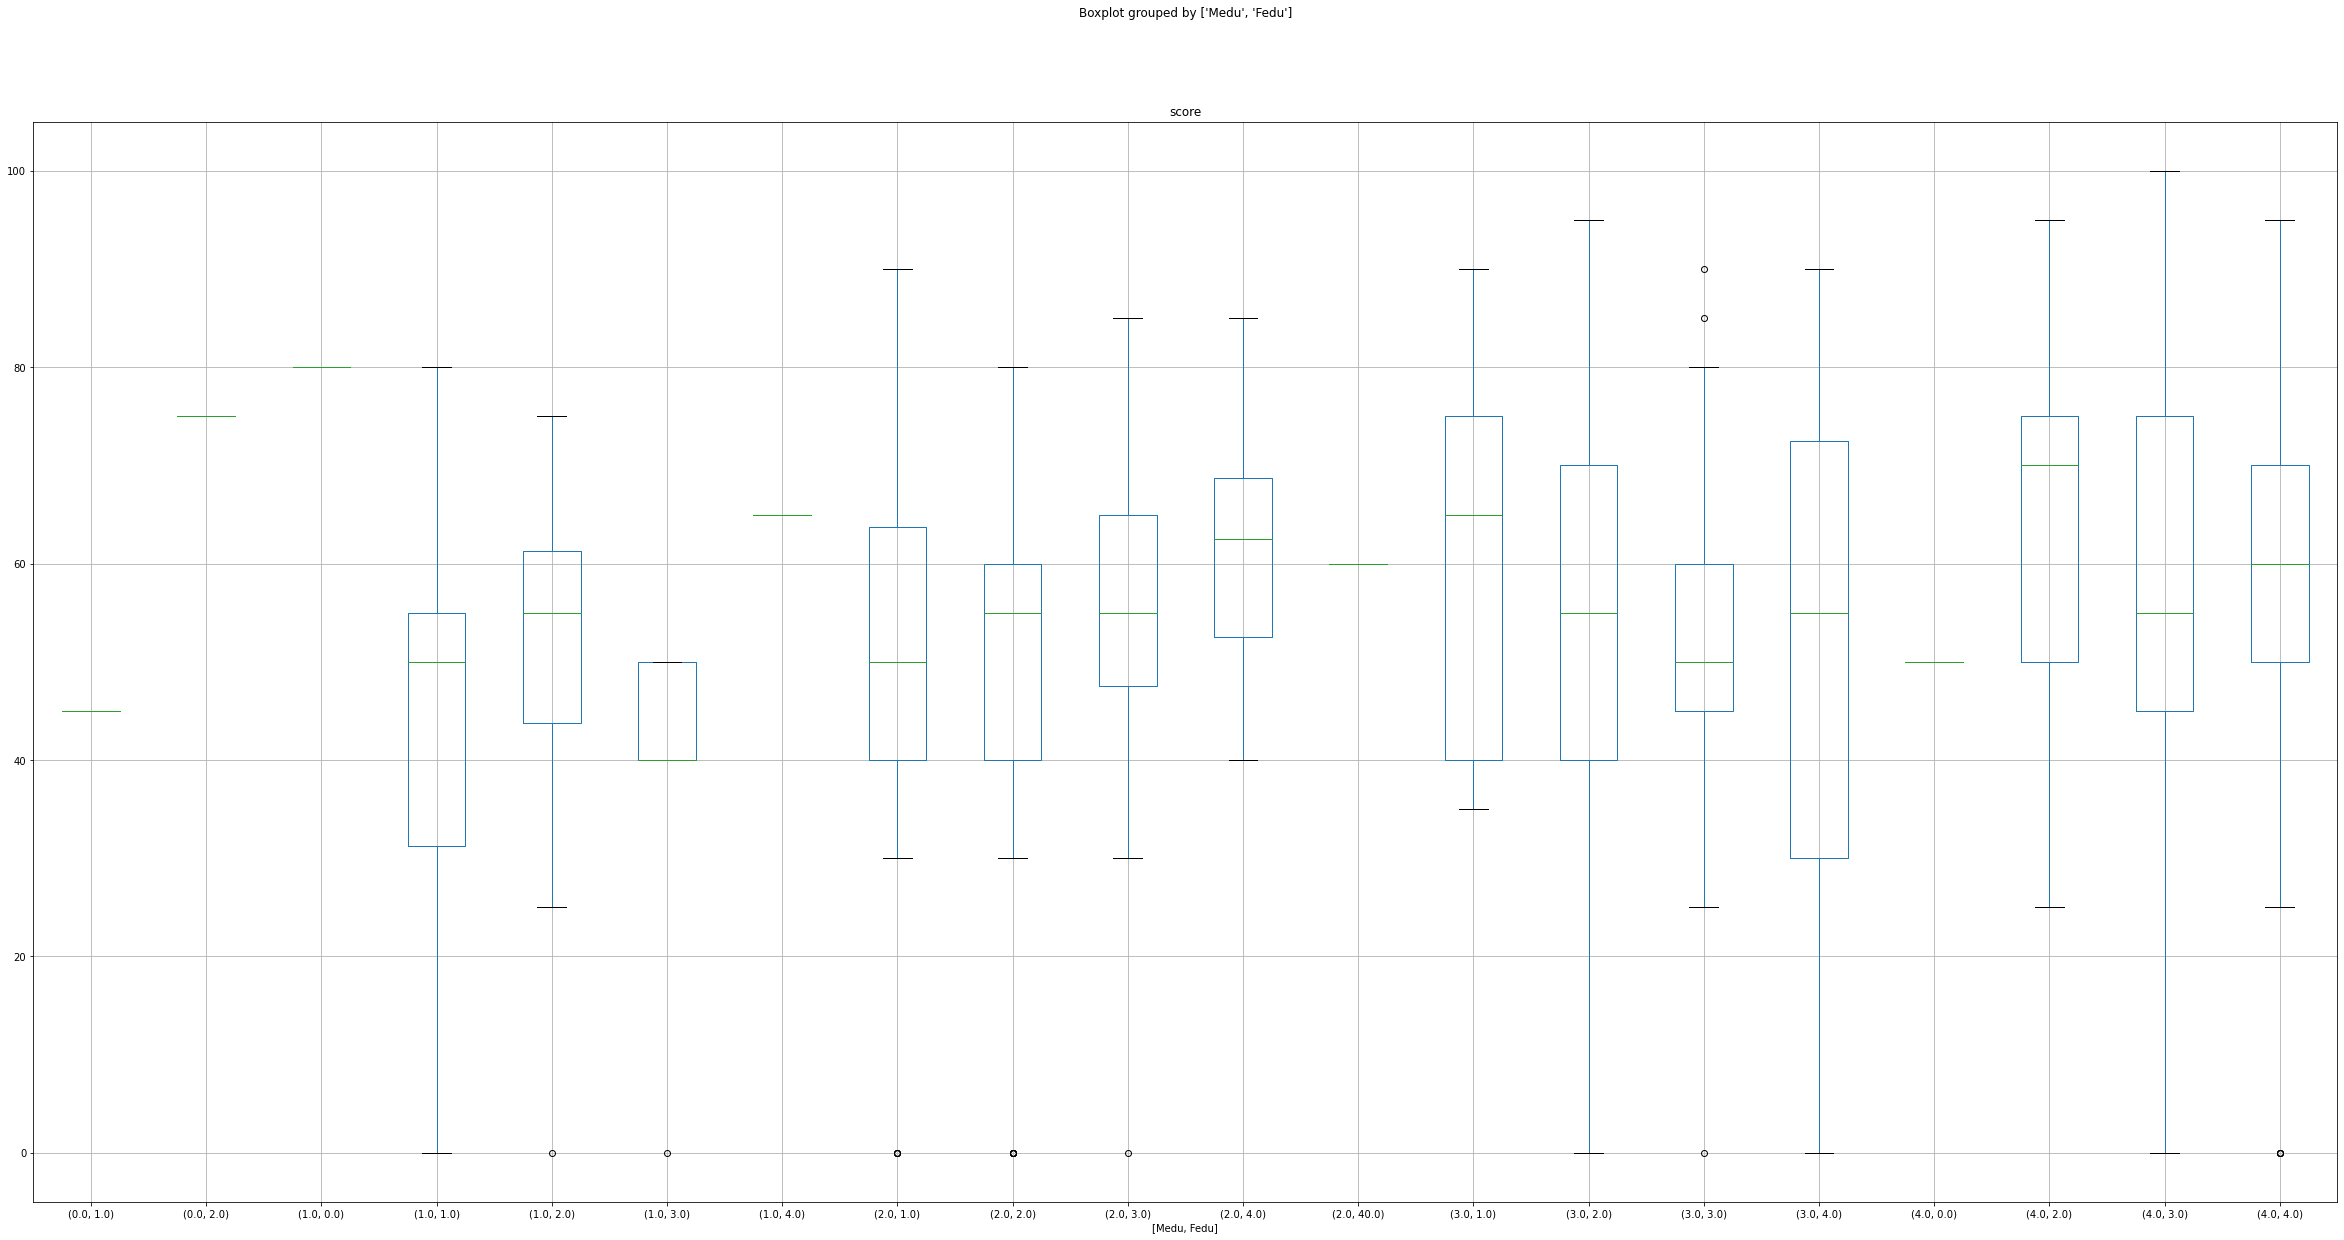

In [14]:
boxplot=stud.boxplot(column = ['score'], by=['Medu','Fedu'],figsize=(40,20))
#'Medu'=4,'Fedu'=2 имеют наивысшую медиану, эти признаки однозначно надо оставить в датасете

Начинаем работу по изменению данных. Сначала изменим выброс параметра Fedu с 40 на 4.

In [15]:
stud.loc[stud['Fedu'] == 40, 'Fedu'] = 4

изменим выброс параметра famrel с -1 на 1.

In [16]:
stud.loc[stud['famrel'] == -1, 'famrel'] = 4

удалим строки с пустыми значениями  score

In [18]:
stud =stud.drop(stud[stud['score'].isnull()].index)

удалим столбцы с данными, которые слабо влияют на целевую переменную. Это столбцы age, famsize,Pstatus,reason,guardian ,famsup,paid,activities,nursery,romantic


In [19]:
delete_col=['age', 'famsize','Pstatus','reason','guardian' ,'famsup','paid','activities','nursery','romantic']
for col in delete_col:
    stud.drop([col], inplace = True, axis = 1) #удаляем не информативный столбец

Проверим столбец 'absences'. 

Столбец absences содержит значений - 378 , не заполненных значений - 11


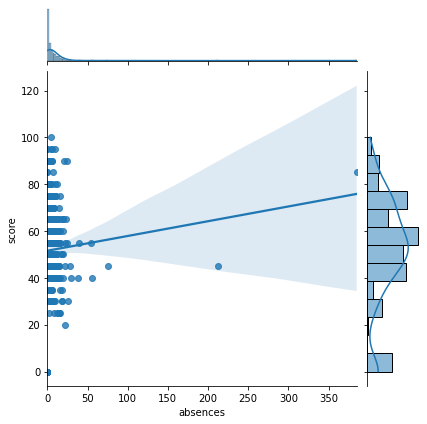

In [20]:
column='absences'
print('Столбец',column,'содержит значений -',stud[column].count(),', не заполненных значений -', stud[column].isnull().sum()) 

sns.jointplot(x=column, y='score', data=stud, kind='reg')

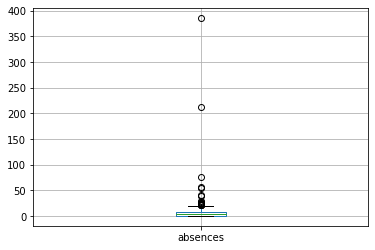

In [21]:
display(boxplot = stud.boxplot(column))

In [22]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
exceptions= stud.absences[stud.absences>(perc75 + 1.5*IQR)].count()
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Количество выбросов: {},".format(exceptions),
"Границы выбросов: [{f}, {l}],".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Количество выбросов: 17, Границы выбросов: [-12.0, 20.0],


В данных о пропусках занятий мы наблюдаем 17 выбросов, но очень сильно выделяется запись с 385 пропусками и оценкой выше 80 и вторая запись с более 200 пропусками. Приведем все выбросы к третьему квантилю и посмотрим, что получится

In [23]:
stud.loc[stud['absences'] > perc75 + 1.5*IQR, 'absences'] = perc75

In [24]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
exceptions= stud.absences[stud.absences>(perc75 + 1.5*IQR)].count()
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Количество выбросов: {},".format(exceptions),
"Границы выбросов: [{f}, {l}],".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Количество выбросов: 0, Границы выбросов: [-12.0, 20.0],


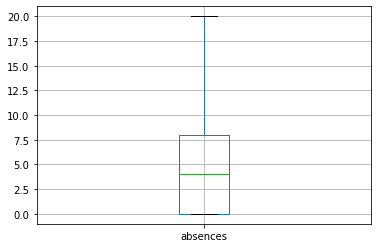

In [25]:
display(boxplot = stud.boxplot(column))

Столбец absences содержит значений - 378 , не заполненных значений - 11


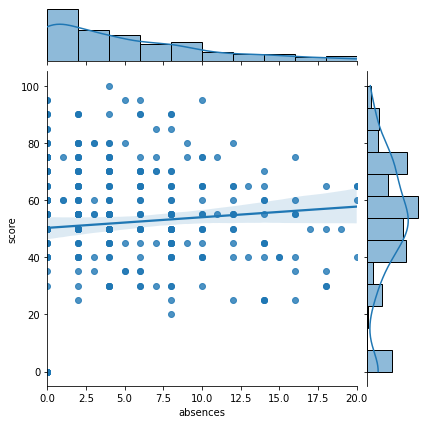

In [26]:
column='absences'
print('Столбец',column,'содержит значений -',stud[column].count(),', не заполненных значений -', stud[column].isnull().sum()) 

sns.jointplot(x=column, y='score', data=stud, kind='reg')

Почти горизонтальная линия говорит нам о том, что количество пропусков слабо коррелируется с целевой переменной. Этим параметром можно пренебречь.

Проверяем данные на пропуски тепловой картой. Нам не очень повезло: почти во всех столбцах есть пропущенные данные. Полностью заполнены только первые три столбца с наименованием школы, пола и возраста. У трех столбцов отсутствуют 10 и более % данных.

<AxesSubplot:>

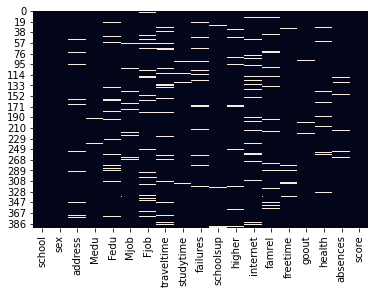

In [27]:
sns.heatmap(stud.isnull(), xticklabels=1, cbar=False)


In [28]:
for col in stud.columns:
    pct_missing = stud[col].isnull().sum()/len(stud[col])
    print('{} -{} - {}%'.format(col, stud[col].isnull().sum(), round(pct_missing*100)))

school -0 - 0%
sex -0 - 0%
address -15 - 4%
Medu -3 - 1%
Fedu -24 - 6%
Mjob -19 - 5%
Fjob -36 - 9%
traveltime -28 - 7%
studytime -7 - 2%
failures -22 - 6%
schoolsup -9 - 2%
higher -20 - 5%
internet -34 - 9%
famrel -27 - 7%
freetime -9 - 2%
goout -7 - 2%
health -15 - 4%
absences -11 - 3%
score -0 - 0%


Анализируя существующие методы и подходы, приходим к выводу, что наиболее популярными стратегиями работы с недостающими данными являются:

Оставить их такими, какие они есть.
Удаление их с dropna(),
Заполнение значений NA / NaNfillna(),
Замена отсутствующих значений ожидаемыми значениями (средними) или нулями.
Удаление столбца в случае, если число его пропущенных значений превышает определенный порог (например,> 50% значений).

In [29]:
#Удаление их сdropna()
stud_dropna= stud.dropna(axis = 0, how ='any')

# сравнение размеров фреймов данных

print("Размер старой таблицы до чистки:", len(stud), 
      "\nРазмер новой таблицы:", len(stud_dropna), 
      "\nКоличество данных с минимум 1 пропущенным значением: ",       (len(stud)-len(stud_dropna)),
      '\n',round(((len(stud)-len(stud_dropna))/len(stud))*100,2),'% данных удалено')

Размер старой таблицы до чистки: 389 
Размер новой таблицы: 189 
Количество данных с минимум 1 пропущенным значением:  200 
 51.41 % данных удалено


Как видим было удалено более 50% данных, что не допустимо. Вывод: нельзя применять метод dropna() в таком виде.

Попробуем найти строки в которых отсутствуют несколько ячеек

In [30]:
stud['num_nulls']=stud.isnull().sum(axis=1)
stud['num_nulls'].value_counts()

0    189
1    130
2     54
3     16
Name: num_nulls, dtype: int64

Попробуем заменить отсутствующие данные объектных признаков на моду

In [32]:
column_list_object = stud.select_dtypes(include='object').columns #только столбцы с объектами в значениях

for column in column_list_object:
    change_nan_to_mode(column_list_object)

def change_nan_to_mode(column_list):
    mode_column = stud[column].mode()[0]
    stud[column] = stud[column].apply(lambda x: mode_column if str(x) == 'nan' else x)

Попробуем заменить отсутствующие данные числовых признаков на медиану

In [33]:
column_list_number = stud.select_dtypes(include='number').columns #только столбцы с цифрами в значениях

for column in column_list_number:
    change_nan_to_mode(column_list_number)

def change_nan_to_median(column_list):
    med_column = stud[column].median()
    stud[column] = stud[column].apply(lambda x: med_column if str(x) == 'nan' else x)

KeyError: "['num_nulls'] not found in axis"

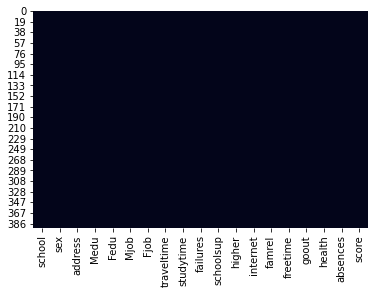

In [35]:
sns.heatmap(stud.isnull(), xticklabels=1, cbar=False)
stud.drop(['num_nulls'], inplace = True, axis = 1)
#теперь в нашем датасете нет пустых ячеек

In [36]:
display(round(stud.corr(),2))

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
Medu,1.00,0.58,-0.16,0.08,-0.24,-0.01,0.04,0.07,-0.07,0.08,0.20
Fedu,0.58,1.00,-0.11,0.01,-0.26,-0.02,-0.02,0.05,-0.02,-0.03,0.12
traveltime,-0.16,-0.11,1.00,-0.10,0.04,-0.03,-0.02,0.05,-0.04,-0.03,-0.06
studytime,0.08,0.01,-0.10,1.00,-0.17,0.03,-0.12,-0.05,-0.06,-0.07,0.11
failures,-0.24,-0.26,0.04,-0.17,1.00,-0.01,0.09,0.10,0.08,0.08,-0.34
famrel,-0.01,-0.02,-0.03,0.03,-0.01,1.00,0.16,0.06,0.10,-0.06,0.05
freetime,0.04,-0.02,-0.02,-0.12,0.09,0.16,1.00,0.29,0.07,0.06,0.02
goout,0.07,0.05,0.05,-0.05,0.10,0.06,0.29,1.00,-0.02,0.09,-0.13
health,-0.07,-0.02,-0.04,-0.06,0.08,0.10,0.07,-0.02,1.00,-0.02,-0.08
absences,0.08,-0.03,-0.03,-0.07,0.08,-0.06,0.06,0.09,-0.02,1.00,0.07


<AxesSubplot:>

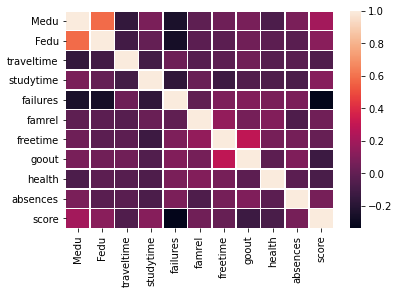

In [37]:
sns.heatmap(stud.corr(),annot=False, linewidths=.5)

Выводы

Мы провели первичную обработку данных. Так как данных много, написали функции, которые можно применять к столбцам определённого типа. Посмотрели на распределение признака для числовых переменных, устранили выбросы и ошибки в данных.
Оценили количество уникальных значений для номинативных переменных. Преобразовали данные. Проведили корреляционный анализ количественных переменных. Отобрали не коррелирующие переменные. Проанализировали номинативные переменные и устранили те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).